# Activation Analysis
This notebook extracts and compares activations from a transformer model's layers for two input prompts.


In [1]:
import torch
import ipywidgets as widgets
import transformer_lens
import activation_analysis
import model_loader
from activation_analysis import activation_agg_sim, compare_activation_similarity, display_activation_similarity_tables, display_activation_similarity_plots
from model_loader import load_model, print_available_models, gpu_mem_check,list_available_models

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# SELECT MODEL #
model_dropdown = widgets.Dropdown(
    options=list_available_models(),
    value=list_available_models()[0],  # Set default to first model
    description='Select Model:',
    disabled=False,
)
display(model_dropdown)

Dropdown(description='Select Model:', options=('gpt2-small', 'gpt2-medium', 'Qwen 2-0.5B', 'Qwen 2-0.5B-Instru…

In [2]:
# Reload libraries after updating functions
import importlib
importlib.reload(model_loader)
importlib.reload(activation_analysis)
from activation_analysis import activation_agg_sim, compare_activation_similarity, display_activation_similarity_tables, display_activation_similarity_plots
from model_loader import load_model, print_available_models, gpu_mem_check,list_available_models

In [3]:
# Load Model #
model_name = model_dropdown.value
model = load_model(model_name)
gpu_mem_check()

Loading model gpt2-medium from gpt2-medium...


c:\Users\akozlo\AppData\Local\miniconda3\envs\akpy24\Lib\site-packages\transformers\tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Loaded pretrained model gpt2-medium into HookedTransformer
Model loaded successfully on cuda.
Total GPU Memory: 11.99 GB
Allocated GPU Memory: 1.54 GB
Cached GPU Memory: 1.55 GB


In [4]:
# Perform a forward pass with "hello world"
input_text = "hello world"
tokens = model.to_tokens(input_text)
logits, cache = model.run_with_cache(tokens)

# Display available activation tensors
print("Available activation tensors:")
for key, value in cache.items():
    if isinstance(value, torch.Tensor):
        print(f"{key}: Shape {value.shape}")
    elif isinstance(value, list):
        print(f"{key}: List of {len(value)} tensors")
        for i, tensor in enumerate(value):
            print(f"  - {key}[{i}]: Shape {tensor.shape}")


Available activation tensors:
hook_embed: Shape torch.Size([1, 3, 1024])
hook_pos_embed: Shape torch.Size([1, 3, 1024])
blocks.0.hook_resid_pre: Shape torch.Size([1, 3, 1024])
blocks.0.ln1.hook_scale: Shape torch.Size([1, 3, 1])
blocks.0.ln1.hook_normalized: Shape torch.Size([1, 3, 1024])
blocks.0.attn.hook_q: Shape torch.Size([1, 3, 16, 64])
blocks.0.attn.hook_k: Shape torch.Size([1, 3, 16, 64])
blocks.0.attn.hook_v: Shape torch.Size([1, 3, 16, 64])
blocks.0.attn.hook_attn_scores: Shape torch.Size([1, 16, 3, 3])
blocks.0.attn.hook_pattern: Shape torch.Size([1, 16, 3, 3])
blocks.0.attn.hook_z: Shape torch.Size([1, 3, 16, 64])
blocks.0.hook_attn_out: Shape torch.Size([1, 3, 1024])
blocks.0.hook_resid_mid: Shape torch.Size([1, 3, 1024])
blocks.0.ln2.hook_scale: Shape torch.Size([1, 3, 1])
blocks.0.ln2.hook_normalized: Shape torch.Size([1, 3, 1024])
blocks.0.mlp.hook_pre: Shape torch.Size([1, 3, 4096])
blocks.0.mlp.hook_post: Shape torch.Size([1, 3, 4096])
blocks.0.hook_mlp_out: Shape tor

In [6]:
results = compare_activation_similarity(model, "It's so nice outside", "What a beautiful day")
#results

In [14]:
display_activation_similarity_tables(model, 
                                    prompt1 = "iasdlkjasdlkjfalkj", 
                                    prompt2 = "What a beautiful day;",
                                     mlp=True, attention=True, resid=True)

Note: prompt1 and prompt2 have different token lengths. Activation similarity is therefore calculated through aggregating or padding sequences.


Layer,Aggregate Similarity
blocks.0.hook_resid_post,0.9643
blocks.1.hook_resid_post,0.9521
blocks.2.hook_resid_post,0.9447
blocks.3.hook_resid_post,0.9926
blocks.4.hook_resid_post,0.9922
blocks.5.hook_resid_post,0.9919
blocks.6.hook_resid_post,0.9915
blocks.7.hook_resid_post,0.9907
blocks.8.hook_resid_post,0.9901
blocks.9.hook_resid_post,0.9890


Layer,Aggregate Similarity
blocks.0.hook_attn_out,0.7925
blocks.1.hook_attn_out,0.8961
blocks.2.hook_attn_out,0.5665
blocks.3.hook_attn_out,0.3873
blocks.4.hook_attn_out,0.1158
blocks.5.hook_attn_out,-0.0228
blocks.6.hook_attn_out,0.1555
blocks.7.hook_attn_out,0.2486
blocks.8.hook_attn_out,0.2787
blocks.9.hook_attn_out,0.0543


Layer,Aggregate Similarity
blocks.0.hook_mlp_out,0.9652
blocks.1.hook_mlp_out,0.7783
blocks.2.hook_mlp_out,0.9717
blocks.3.hook_mlp_out,0.9996
blocks.4.hook_mlp_out,0.8336
blocks.5.hook_mlp_out,0.8768
blocks.6.hook_mlp_out,0.7052
blocks.7.hook_mlp_out,0.5028
blocks.8.hook_mlp_out,0.3381
blocks.9.hook_mlp_out,0.1516


Note: prompt1 and prompt2 have different token lengths. Activation similarity is therefore calculated through aggregating or padding sequences.


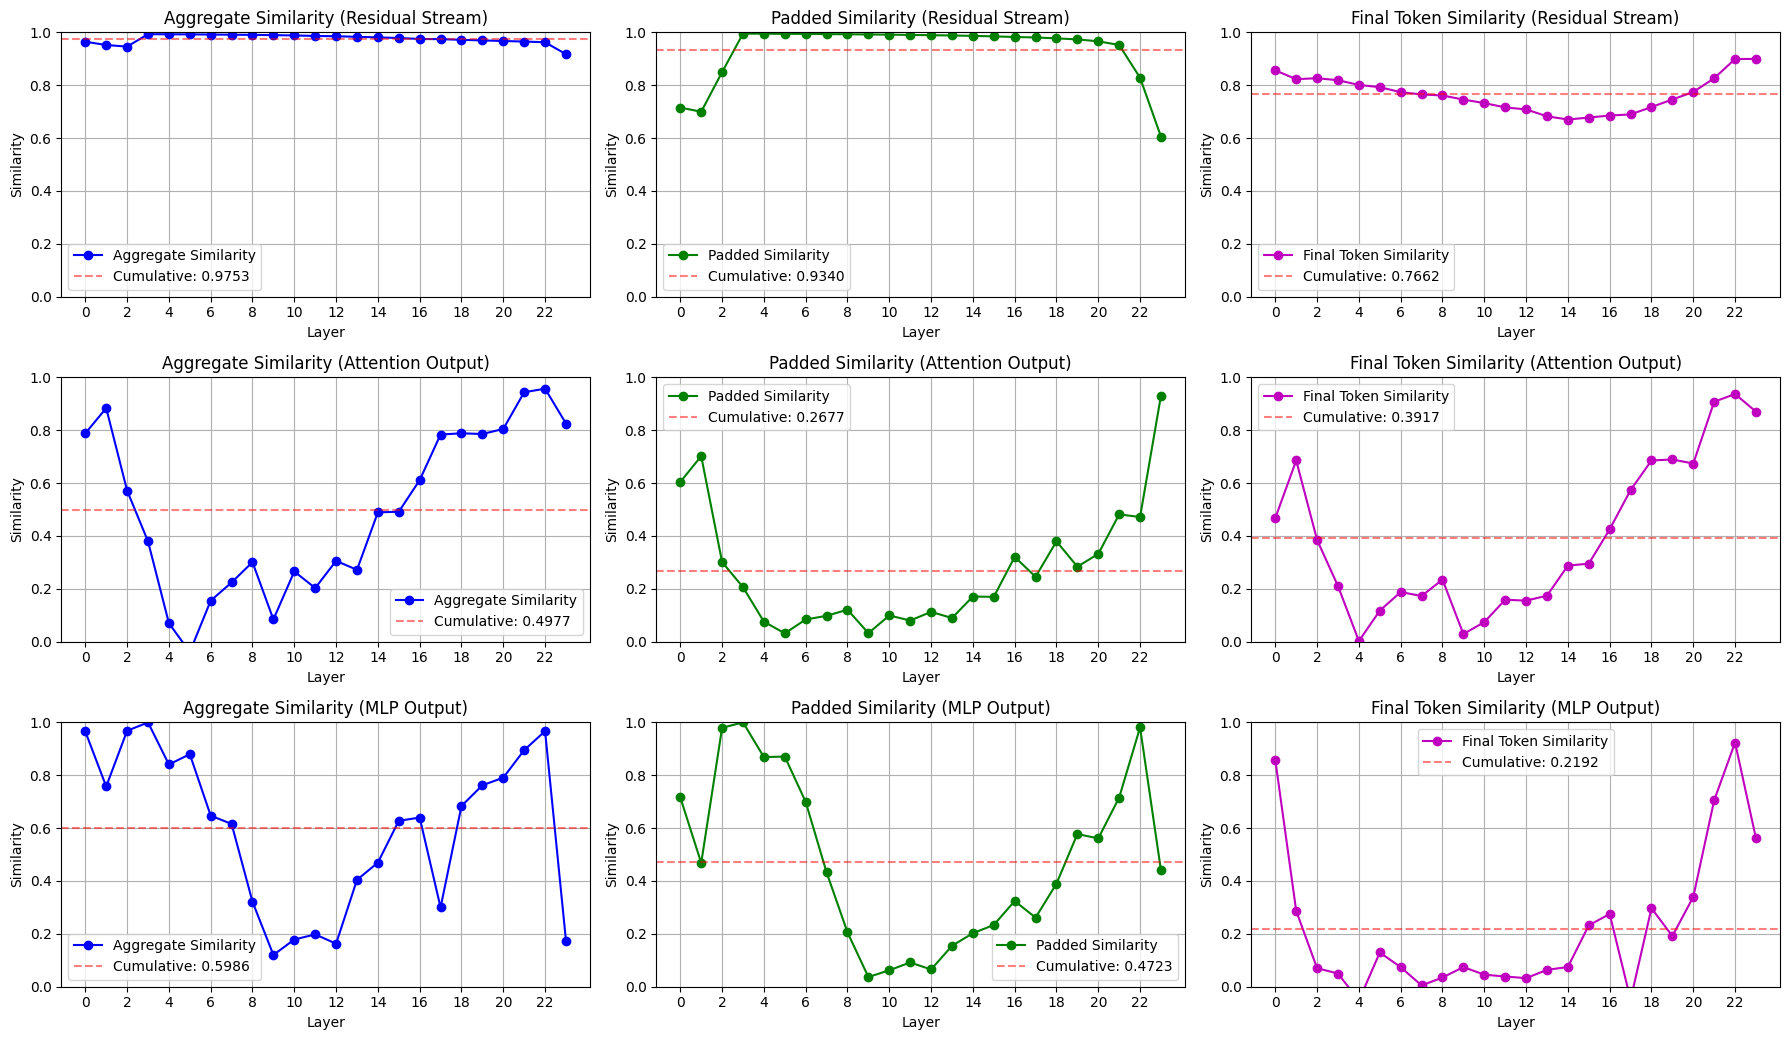

In [8]:
display_activation_similarity_plots(model,
                                    prompt1 = "asdlkmnasdlkmasdc", 
                                    prompt2 = "What a beautiful day;",
                                    resid=True, attention=True, mlp=True, logscale=False)

In [10]:
import torch
from transformer_lens import HookedTransformer

def get_activation_tensor(transformer: HookedTransformer, prompt: str, layer: int, part: str) -> torch.Tensor:
    """
    Retrieve the specified activation tensor from a HookedTransformer model.

    Args:
        transformer (HookedTransformer): The HookedTransformer model.
        prompt (str): The input prompt.
        layer (int): The layer number to retrieve activations from (0-indexed).
        part (str): The part of the architecture to target. 
                'attn_out': The output of the attention sublayer.
                'attn_pattern': The attention patterns (weights) from the attention heads.
                'mlp_out': The output of the MLP sublayer.
                'resid_pre': The residual connection before any sublayers.
                'resid_mid': The residual after the attention sublayer and before the MLP.
                'resid_post': The residual after both the attention and MLP sublayers.
    Returns:
        torch.Tensor: The activation tensor for the specified layer and part.

    Raises:
        ValueError: If an invalid part is specified or if the layer/part does not exist.
    """
    # Map parts to hook names
    part_to_hook_name = {
        'attn_out': f'blocks.{layer}.hook_attn_out',
        'mlp_out': f'blocks.{layer}.hook_mlp_out',
        'resid_pre': f'blocks.{layer}.hook_resid_pre',
        'resid_mid': f'blocks.{layer}.hook_resid_mid',
        'resid_post': f'blocks.{layer}.hook_resid_post',
        'attn_pattern': f'blocks.{layer}.attn.hook_pattern',
    }

    if part not in part_to_hook_name:
        raise ValueError(f"Invalid part '{part}'. Valid parts are: {list(part_to_hook_name.keys())}")

    hook_name = part_to_hook_name[part]

    # Run the model with cache
    _, cache = transformer.run_with_cache(prompt)

    # Retrieve the activation from the cache
    if hook_name not in cache:
        # For debugging: print available keys
        print(f"Available keys in cache: {list(cache.keys())}")
        raise ValueError(f"No activation captured for part '{part}' in layer {layer}.")

    return cache[hook_name]


In [18]:
act1 = get_activation_tensor(model, "The weather is fantastic", 7, "resid_post")
act2 = get_activation_tensor(model, "It's so nice outside", 7, "resid_post")
#activation_agg_sim(act1, act2)
#torch.nn.functional.cosine_similarity(act1, act2, dim=-1)
act2

tensor([[[ 3.0311,  4.2789,  4.1146,  ...,  4.3179,  4.0727,  4.2466],
         [-0.6531, -2.8351, -1.4011,  ...,  1.9129, -0.5468, -2.4544],
         [-2.4525, -2.1734,  0.9812,  ...,  1.8215,  0.1423,  0.3606],
         [-1.0565, -0.8060, -0.3419,  ..., -0.0869, -3.5287, -0.0118],
         [-1.6709,  2.4016,  5.3919,  ...,  1.7063,  0.9470, -0.1380],
         [ 0.5648, -3.6126, -3.3616,  ..., -0.0353, -0.7508,  2.4309]]],
       device='cuda:0')

In [1]:
act1_second_vector = act1[0][1]



NameError: name 'act1' is not defined

In [22]:
1+1

2